In [1]:
import pandas as pd
import random

In [2]:
df = pd.read_csv("./15-Points.csv")
df

,x,y,City
0,5.500000e-08,9.860000e-09,1
1,-2.887330e+01,-7.980000e-08,2
2,-7.929160e+01,-2.140330e+01,3
3,-1.465770e+01,-4.338960e+01,4
4,-6.474730e+01,2.189820e+01,5
5,-2.905850e+01,-4.321670e+01,6
6,-7.207850e+01,1.815810e-01,7
7,-3.603660e+01,-2.161350e+01,8
8,-5.048080e+01,7.374470e+00,9
9,-5.058590e+01,-2.158820e+01,10


In [3]:
## GENE


class City:
    def __init__(self , _id , x , y, visited = False):
        self._id = _id
        self.x = x
        self.y = y
        self.visited = visited
        # self.cities= []

    def __repr__(self) -> str:
        return (f"_id : {self._id} , x , y : {[self.x , self.y]} ,visited : {self.visited} ")





In [4]:
cities = []

for i in range(len(df)):
    cities.append(City(df.iloc[i]["City"]  , df.iloc[i]["x"] ,df.iloc[i]["y"]   ))


In [6]:
import random
import math

class TSP:
    def __init__(self, city_list, population_size, generations, elitism_percentage, crossover_probability, mutation_probability):
        self.city_list = city_list
        self.population_size = population_size
        self.generations = generations       ## Number of iterations and stopping criteria 
        self.elitism_percentage = elitism_percentage
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability

    def calculate_distance(self, city1, city2):
        return math.sqrt((city1.x - city2.x)**2 + (city1.y - city2.y)**2)

    def calculate_total_distance(self, cities):
        """
            Calculate total tour cost
        """
        total_distance = 0
        for i in range(len(cities) - 1):
            total_distance += self.calculate_distance(cities[i], cities[i+1])
        return total_distance

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            shuffled_cities = random.sample(self.city_list, len(self.city_list))
            population.append(shuffled_cities)
        return population

    def selection(self, population):
        sorted_population = sorted(population, key=lambda x: self.calculate_total_distance(x))
        elitism_size = int(self.elitism_percentage * len(population))
        elite_individuals = sorted_population[:elitism_size]
        return elite_individuals

    def crossover(self, parent1, parent2):
        offspring = [None] * len(parent1)
        start_index = random.randint(0, len(parent1) - 1)
        end_index = random.randint(start_index + 1, len(parent1))
        for i in range(start_index, end_index):
            offspring[i] = parent1[i]
        remaining_cities = [city for city in parent2 if city not in offspring]
        remaining_index = 0
        for i in range(len(offspring)):
            if offspring[i] is None:
                offspring[i] = remaining_cities[remaining_index]
                remaining_index += 1
        return offspring

    def mutation(self, individual):
        mutated_individual = individual.copy()
        for i in range(len(mutated_individual)):
            if random.random() < self.mutation_probability:
                j = random.randint(0, len(mutated_individual) - 1)
                mutated_individual[i], mutated_individual[j] = mutated_individual[j], mutated_individual[i]
        return mutated_individual

    def solve(self):
        population = self.create_initial_population()
        for _ in range(self.generations):
            elite_individuals = self.selection(population)
            new_population = elite_individuals.copy()
            while len(new_population) < self.population_size:
                parent1 = random.choice(population)
                parent2 = random.choice(population)
                if random.random() < self.crossover_probability:
                    offspring = self.crossover(parent1, parent2)
                    offspring = self.mutation(offspring)
                    new_population.append(offspring)
            population = new_population
        best_individual = min(population, key=lambda x: self.calculate_total_distance(x))
        best_tour = [x._id for x in best_individual    ]
        return best_tour



population_size = 50
generations = 100
elitism_percentage = 0.02
crossover_probability = 0.6
mutation_probability = 0.1

tsp = TSP(cities, population_size, generations, elitism_percentage, crossover_probability, mutation_probability)
best_route = tsp.solve()
print(best_route)


[5.0, 7.0, 8.0, 14.0, 12.0, 10.0, 3.0, 9.0, 15.0, 2.0, 13.0, 1.0, 4.0, 6.0, 11.0]


In [7]:
len(best_route) ,len(set(best_route))

(15, 15)

In [8]:
import random
import math

class City:
    def __init__(self, _id, x, y):
        self._id = _id
        self.x = x
        self.y = y

    def __repr__(self):
        return f"City(id={self._id}, x={self.x}, y={self.y})"


class Chrom:
    def __init__(self, tour):
        self.tour = tour
        self.total_cost = self.calculate_total_cost()

    def calculate_distance(self, city1, city2):
        return math.sqrt((city1.x - city2.x)**2 + (city1.y - city2.y)**2)

    def calculate_total_cost(self):
        total_cost = 0
        for i in range(len(self.tour) - 1):
            total_cost += self.calculate_distance(self.tour[i], self.tour[i+1])
        return total_cost

    def __repr__(self):
        return f"Chrom(tour={self.tour}, total_cost={self.total_cost})"


class TSP:
    def __init__(self, city_list, population_size, generations, elitism_percentage, crossover_probability, mutation_probability):
        self.city_list = city_list
        self.population_size = population_size
        self.generations = generations
        self.elitism_percentage = elitism_percentage
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            shuffled_cities = random.sample(self.city_list, len(self.city_list))
            population.append(Chrom(shuffled_cities))
        return population

    def selection(self, population):
        sorted_population = sorted(population, key=lambda x: x.total_cost)
        elitism_size = int(self.elitism_percentage * len(population))
        elite_individuals = sorted_population[:elitism_size]
        return elite_individuals

    def crossover(self, parent1, parent2):
        offspring = [None] * len(parent1.tour)
        start_index = random.randint(0, len(parent1.tour) - 1)
        end_index = random.randint(start_index + 1, len(parent1.tour))
        for i in range(start_index, end_index):
            offspring[i] = parent1.tour[i]
        remaining_cities = [city for city in parent2.tour if city not in offspring]
        remaining_index = 0
        for i in range(len(offspring)):
            if offspring[i] is None:
                offspring[i] = remaining_cities[remaining_index]
                remaining_index += 1
        return Chrom(offspring)

    def mutation(self, individual):
        mutated_tour = individual.tour.copy()
        for i in range(len(mutated_tour)):
            if random.random() < self.mutation_probability:
                j = random.randint(0, len(mutated_tour) - 1)
                mutated_tour[i], mutated_tour[j] = mutated_tour[j], mutated_tour[i]
        return Chrom(mutated_tour)

    def solve(self):
        population = self.create_initial_population()
        for _ in range(self.generations):
            elite_individuals = self.selection(population)
            new_population = elite_individuals.copy()
            while len(new_population) < self.population_size:
                parent1 = random.choice(population)
                parent2 = random.choice(population)
                if random.random() < self.crossover_probability:
                    offspring = self.crossover(parent1, parent2)
                    offspring = self.mutation(offspring)
                    new_population.append(offspring)
            population = new_population
        best_individual = min(population, key=lambda x: x.total_cost)
        best_tour = ([x._id for x in best_individual.tour] , best_individual.total_cost)
        return best_tour




population_size = 50
generations = 100
elitism_percentage = 0.02
crossover_probability = 0.6
mutation_probability = 0.5

tsp = TSP(cities, population_size, generations, elitism_percentage, crossover_probability, mutation_probability)
best_route = tsp.solve()
print(best_route)


([3.0, 7.0, 9.0, 5.0, 6.0, 4.0, 11.0, 1.0, 13.0, 2.0, 15.0, 14.0, 12.0, 8.0, 10.0], 374.3255233712983)


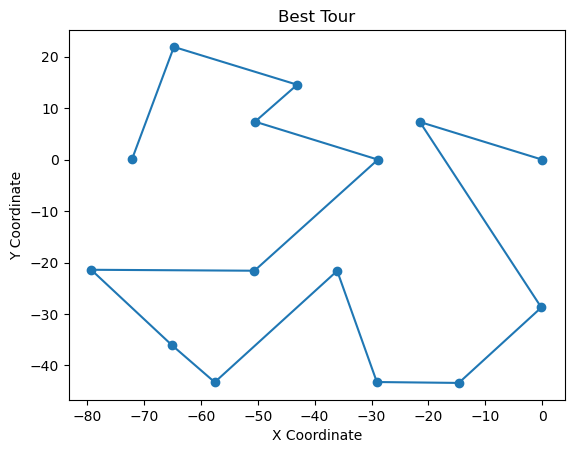

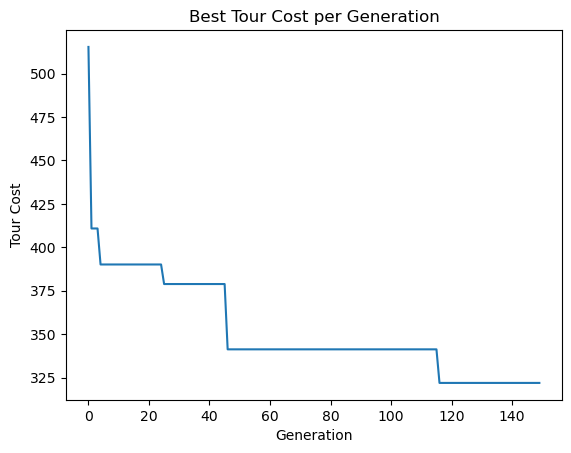

In [ ]:
import random
import math
import matplotlib.pyplot as plt

class City:
    def __init__(self, _id, x, y):
        self._id = _id
        self.x = x
        self.y = y

    def __repr__(self):
        return f"City(id={self._id}, x={self.x}, y={self.y})"


class Chrom:
    def __init__(self, tour):
        self.tour = tour
        self.total_cost = self.calculate_total_cost()

    def calculate_distance(self, city1, city2):
        return math.sqrt((city1.x - city2.x)**2 + (city1.y - city2.y)**2)

    def calculate_total_cost(self):
        total_cost = 0
        for i in range(len(self.tour) - 1):
            total_cost += self.calculate_distance(self.tour[i], self.tour[i+1])
        return total_cost

    def __repr__(self):
        return f"Chrom(tour={self.tour}, total_cost={self.total_cost})"


class TSP:
    def __init__(self, city_list, population_size, generations, elitism_percentage, crossover_probability, mutation_probability):
        self.city_list = city_list
        self.population_size = population_size
        self.generations = generations
        self.elitism_percentage = elitism_percentage
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability
        self.best_tours_per_generation = []
        self.best_tour_cost_per_generation = []

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            shuffled_cities = random.sample(self.city_list, len(self.city_list))
            population.append(Chrom(shuffled_cities))
        return population

    def selection(self, population):
        sorted_population = sorted(population, key=lambda x: x.total_cost)
        elitism_size = int(self.elitism_percentage * len(population))
        elite_individuals = sorted_population[:elitism_size]
        return elite_individuals

    def crossover(self, parent1, parent2):
        offspring = [None] * len(parent1.tour)
        start_index = random.randint(0, len(parent1.tour) - 1)
        end_index = random.randint(start_index + 1, len(parent1.tour))
        for i in range(start_index, end_index):
            offspring[i] = parent1.tour[i]
        remaining_cities = [city for city in parent2.tour if city not in offspring]
        remaining_index = 0
        for i in range(len(offspring)):
            if offspring[i] is None:
                offspring[i] = remaining_cities[remaining_index]
                remaining_index += 1
        return Chrom(offspring)

    def mutation(self, individual):
        mutated_tour = individual.tour.copy()
        for i in range(len(mutated_tour)):
            if random.random() < self.mutation_probability:
                j = random.randint(0, len(mutated_tour) - 1)
                mutated_tour[i], mutated_tour[j] = mutated_tour[j], mutated_tour[i]
        return Chrom(mutated_tour)

    def solve(self):
        population = self.create_initial_population()
        for generation in range(self.generations):
            elite_individuals = self.selection(population)
            best_tour = elite_individuals[0].tour
            best_tour_cost = elite_individuals[0].total_cost

            self.best_tours_per_generation.append(best_tour)  # Store best tour of the generation
            self.best_tour_cost_per_generation.append(best_tour_cost)  # Store best tour cost of the generation

            new_population = elite_individuals.copy()
            while len(new_population) < self.population_size:
                parent1 = random.choice(population)
                parent2 = random.choice(population)
                if random.random() < self.crossover_probability:
                    offspring = self.crossover(parent1, parent2)
                    offspring = self.mutation(offspring)
                    new_population.append(offspring)
            population = new_population
        best_individual = min(population, key=lambda x: x.total_cost)
        # best_tour = ([x._id for x in best_individual.tour] , best_individual.total_cost)

        return best_individual

    def plot_best_tour(self, best_tour):
        x_coords = [city.x for city in best_tour]
        y_coords = [city.y for city in best_tour]
        plt.plot(x_coords, y_coords, 'o-')
        plt.title('Best Tour')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()

    def plot_best_tour_cost_per_generation(self):
        generation_numbers = list(range(self.generations))
        plt.plot(generation_numbers, self.best_tour_cost_per_generation)
        plt.title('Best Tour Cost per Generation')
        plt.xlabel('Generation')
        plt.ylabel('Tour Cost')
        plt.show()



population_size = 50
generations = 150
elitism_percentage = 0.1
crossover_probability = 0.8
mutation_probability = 0.2

tsp = TSP(cities, population_size, generations, elitism_percentage, crossover_probability, mutation_probability)
best_individual = tsp.solve()
tsp.plot_best_tour(best_individual.tour)
tsp.plot_best_tour_cost_per_generation()


In [ ]:
([x._id for x in best_individual.tour] ,best_individual.total_cost )

([7.0,
  5.0,
  15.0,
  9.0,
  2.0,
  10.0,
  3.0,
  12.0,
  14.0,
  8.0,
  6.0,
  4.0,
  11.0,
  13.0,
  1.0],
 321.97448355264333)

In [24]:
best_individual

Chrom(tour=[_id : 13.0 , x , y : [-21.4983, 7.31942] ,visited : False , _id : 6.0 , x , y : [-29.0585, -43.2167] ,visited : False , _id : 8.0 , x , y : [-36.0366, -21.6135] ,visited : False , _id : 4.0 , x , y : [-14.6577, -43.3896] ,visited : False , _id : 11.0 , x , y : [-0.135819, -28.7293] ,visited : False , _id : 1.0 , x , y : [5.5e-08, 9.86e-09] ,visited : False , _id : 2.0 , x , y : [-28.8733, -7.98e-08] ,visited : False , _id : 5.0 , x , y : [-64.7473, 21.8982] ,visited : False , _id : 9.0 , x , y : [-50.4808, 7.37447] ,visited : False , _id : 15.0 , x , y : [-43.07, 14.5548] ,visited : False , _id : 7.0 , x , y : [-72.0785, 0.181581] ,visited : False , _id : 3.0 , x , y : [-79.2916, -21.4033] ,visited : False , _id : 10.0 , x , y : [-50.5859, -21.5882] ,visited : False , _id : 12.0 , x , y : [-65.0866, -36.0625] ,visited : False , _id : 14.0 , x , y : [-57.5687, -43.2506] ,visited : False ], total_cost=369.9904650805651)